# Explore here

In [412]:
# Your code here

In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import fetch_openml

# **EDA**

In [414]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [415]:
df.shape

(1338, 7)

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


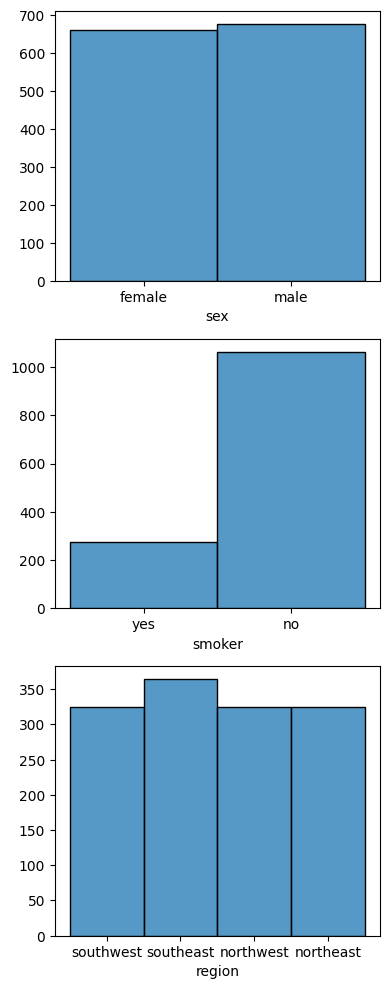

In [417]:
fig, axis = plt.subplots(3, figsize = (4, 10))

sns.histplot(ax = axis[0], data = df, x = "sex").set(ylabel = None)
sns.histplot(ax = axis[1], data = df, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[2], data = df, x = "region").set(ylabel = None)

plt.tight_layout()
plt.show()

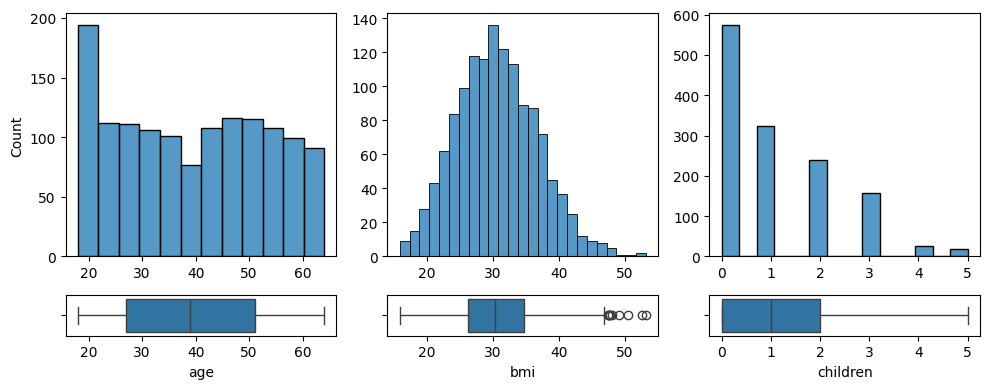

In [418]:
fig, axis = plt.subplots(2, 3, figsize = (10, 4), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")
sns.histplot(ax = axis[0, 2], data = df, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "children")

plt.tight_layout()
plt.show()

In [419]:
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

In [420]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_n',
       'smoker_n', 'region_n'],
      dtype='object')

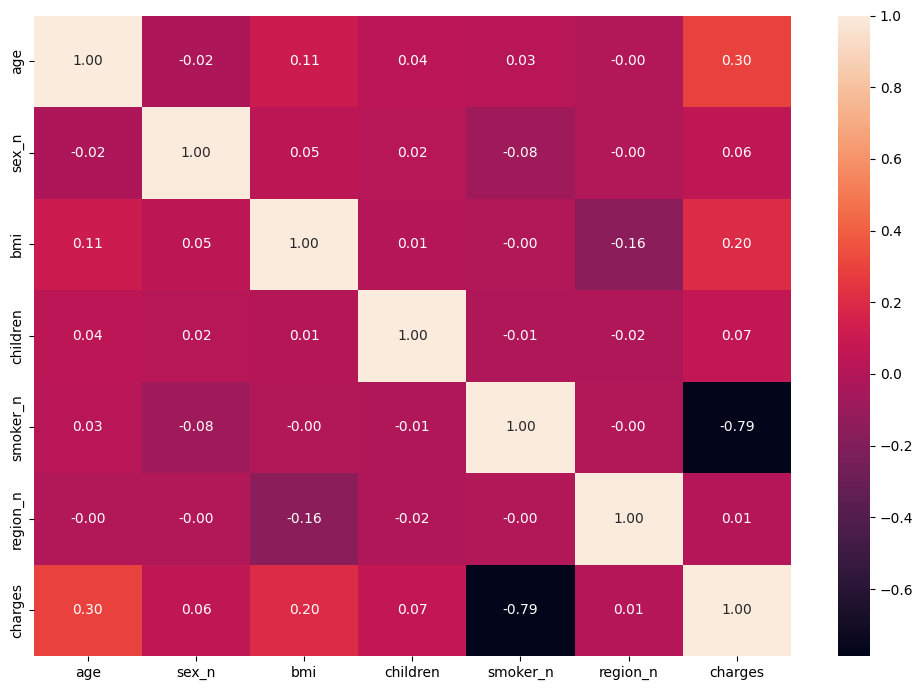

In [421]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.heatmap(df[["age", "sex_n", "bmi", "children", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [422]:
print("Observamos que hay una fuerte relacion entre smoker y el costo del seguro medico. Ademas el coste no tiene nada que ver con la region, ni el sexo ni la cantidad de hijos.")
print("Se observa ademas que las variables independientes no tienen multicolinealidad.")

Observamos que hay una fuerte relacion entre smoker y el costo del seguro medico. Ademas el coste no tiene nada que ver con la region, ni el sexo ni la cantidad de hijos.
Se observa ademas que las variables independientes no tienen multicolinealidad.


In [423]:
df.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


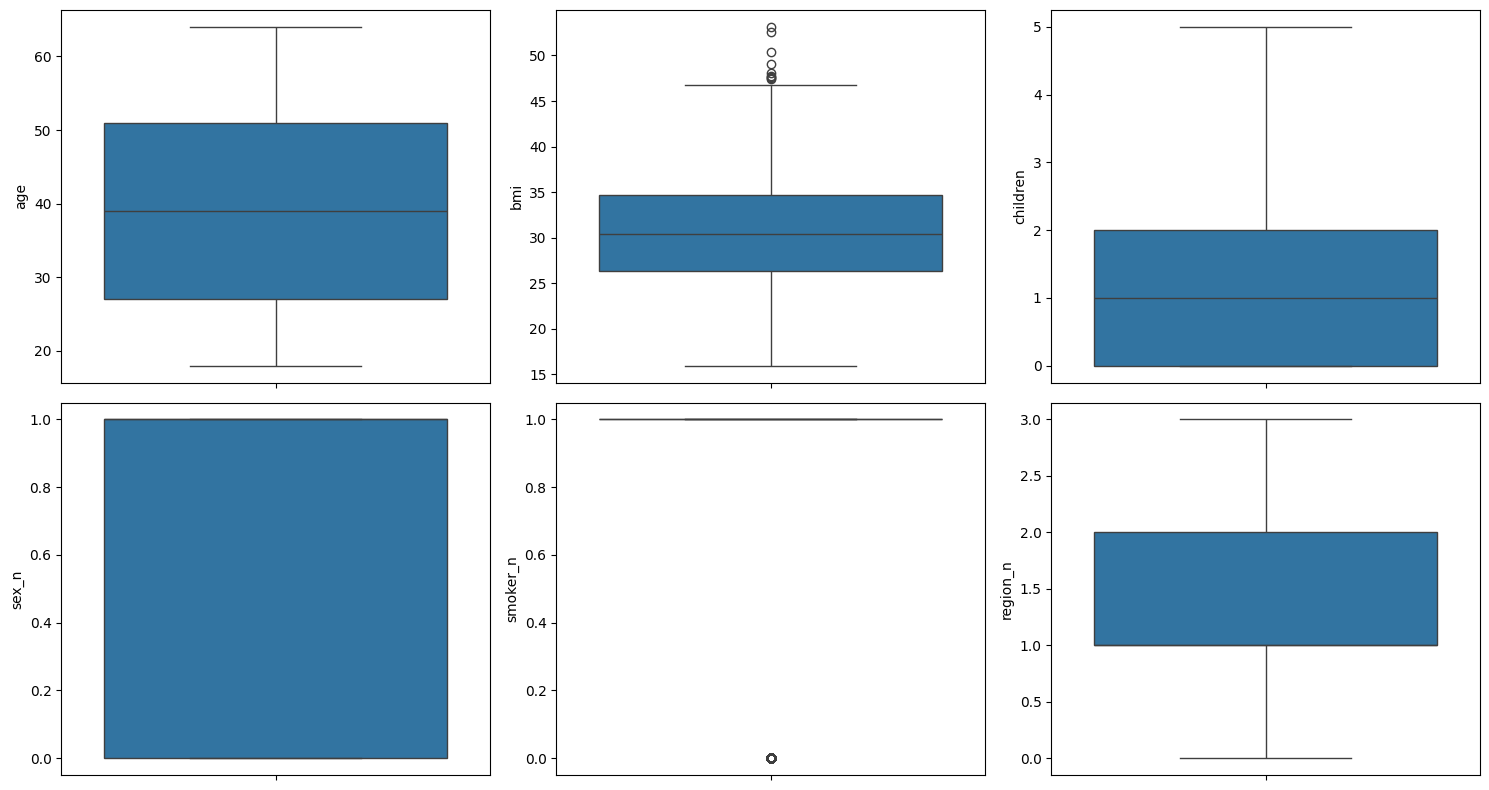

In [424]:
fig, axis = plt.subplots(2, 3, figsize = (15, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = df, y = "children")
sns.boxplot(ax = axis[1, 0], data = df, y = "sex_n")
sns.boxplot(ax = axis[1, 1], data = df, y = "smoker_n")
sns.boxplot(ax = axis[1, 2], data = df, y = "region_n")

plt.tight_layout()
plt.show()

In [425]:
print("Se observa que los outliers mas visibles son los de el bmi, pero voy a optar por mantenerlos ya que las personas con alto BMI si podria afectar el costo del seguro.")

Se observa que los outliers mas visibles son los de el bmi, pero voy a optar por mantenerlos ya que las personas con alto BMI si podria afectar el costo del seguro.


In [426]:
print("Inferencia de nuevas características y Escalado de valores lo realizo en el modelo")

Inferencia de nuevas características y Escalado de valores lo realizo en el modelo


# **Modelo de Regresión Lineal**

## Paso 1. Lectura del conjunto de datos procesado

### 1. Lectura de datos

In [427]:
#Vuelvo a cargar los datos para seguir el proceso, por cuestiones de orden estoy separando el EDA Y el modelo de Regresión Lineal

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [428]:
#df.drop(["region"], axis = 1, inplace = True)
#df.head()

### 2. Visualización de datos

In [429]:
le = LabelEncoder()
df["smoker"] = le.fit_transform(df["smoker"])
df["sex"] = le.fit_transform(df["sex"])
df["region"] = le.fit_transform(df["region"])
print(df[["smoker", "sex", "region"]].head())

   smoker  sex  region
0       1    0       3
1       0    1       2
2       0    1       2
3       0    1       1
4       0    1       1


In [430]:
"""Defini las siguientes variables y haciendo pruebas las 2 primeras mejoran el modelo por estas razones :
1. A mayor edad, el riesgo aumenta más que linealmente.
2. El impacto de tener un BMI alto puede ser mucho mayor si además se es fumador.
3. El tercero lo empeora un poco
asd"""

'Defini las siguientes variables y haciendo pruebas las 2 primeras mejoran el modelo por estas razones :\n1. A mayor edad, el riesgo aumenta más que linealmente.\n2. El impacto de tener un BMI alto puede ser mucho mayor si además se es fumador.\n3. El tercero lo empeora un poco\nasd'

In [431]:
df["age_squared"] = df["age"] ** 2
df["bmi_smoker"] = df["bmi"] * df["smoker"]
#df["age_smoker"] = df["age"] * df["smoker"]
df.drop(["age"], axis = 1, inplace = True)

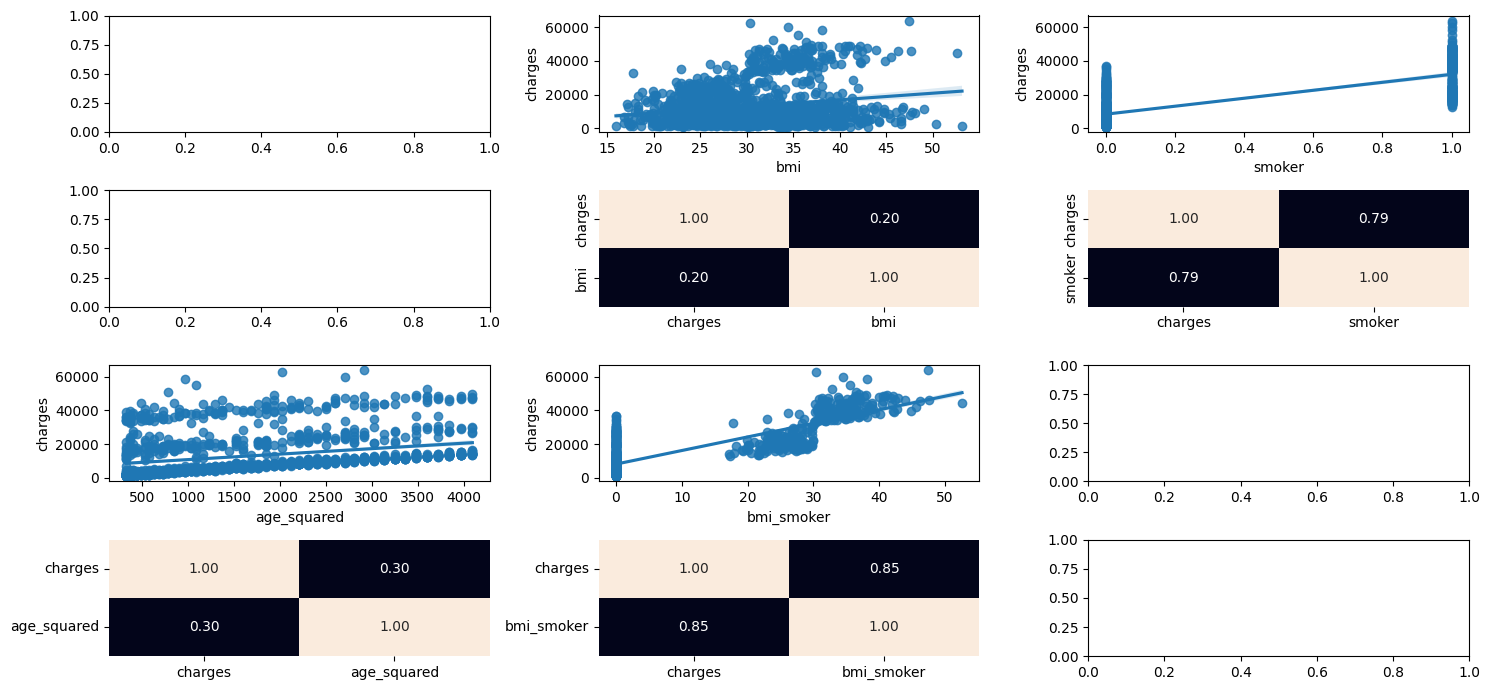

In [432]:
fig, axis = plt.subplots(4, 3, figsize = (15, 7))

#sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
#sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[0, 2], data = df, x = "smoker", y = "charges")
sns.heatmap(df[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[2, 0], data = df, x = "age_squared", y = "charges")
sns.heatmap(df[["charges", "age_squared"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = df, x = "bmi_smoker", y = "charges")
sns.heatmap(df[["charges", "bmi_smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)
#sns.regplot(ax = axis[2, 2], data = df, x = "age_smoker", y = "charges")
#sns.heatmap(df[["charges", "age_smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2], cbar = False)

plt.tight_layout()
plt.show()

In [433]:
print("Se observa que hay mayor linealidad en las nuevas variables")

Se observa que hay mayor linealidad en las nuevas variables


### 3. División de datos

In [434]:
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}")

Datos de entrenamiento: (1070, 7), Datos de prueba: (268, 7)


## Paso 2. Inicialización y entrenamiento del modelo

### 1. Entrenamiento del modelo

In [435]:
#Escalado de valores

In [436]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [437]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 2. Obteniendo los parámetros del modelo

In [438]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 2484.983786405759
Coeficientes (b1, b2): [-5.27624043e+02  1.17424894e+01  6.00032755e+02 -2.11817304e+04
 -3.89089428e+02  3.33558626e+00  1.46982077e+03]


## Paso 3: Predicción del modelo

### 1. Predicción

In [439]:
y_pred = model.predict(X_test)
y_pred

array([10735.22864664,  6771.32368479, 34408.55344436, 10728.77949916,
       28882.18571893,  5749.81472702,  3564.42314716, 15675.93070356,
        5303.11105689, 11714.003215  , 20560.6304196 ,  8734.65908117,
        5459.52599232, 51599.85323196, 52631.12952011, 46257.89928787,
       11416.78250178, 42763.07944917,  9694.31504274, 26913.49111367,
        6155.64214399,  8540.46112114,  2351.20977671,  4566.8173263 ,
       12565.15707942, 12595.29787874, 13737.98742271,  6684.60668519,
       11365.70956618,  2613.82946561,  9398.83948041, 13306.91884775,
        3587.25907637,  7132.28292214,  3997.25520849,  9179.33171261,
        3698.74351863,  8436.34768828, 26283.74334552, 37071.42968891,
        5857.86111425,  4150.85386249, 12798.52789469, 13478.40987232,
        6431.49383135, 13324.21844995,  5161.85332738,  5487.89767316,
       41256.87811082,  6035.53896174, 15371.99916845,  3204.8205038 ,
        8519.23904217,  3344.86222648, 12043.87331369, 11873.4422414 ,
      

### 2. Evaluación del modelo

In [440]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 20625238.975777637
Coeficiente de determinación: 0.8671471336506826


He ido probando alterando las variables y obtube mejores resultados:

MODELO CON LAS COLUMNAS: ["age", "bmi", "smoker", "age_squared", "bmi_smoker"]
Error cuadrático medio: 21872478.613566093
Coeficiente de determinación: 0.8591133183286261

MODELO CON LAS COLUMNAS: ["age", "bmi", "smoker", "age_squared", "bmi_smoker", "children"]
Error cuadrático medio: 21019968.958884895
Coeficiente de determinación: 0.8646045687014279

MODELO CON LAS COLUMNAS: ["age", "bmi", "smoker", "age_squared", "bmi_smoker", "children", "sex"]
Error cuadrático medio: 20969261.185029984
Coeficiente de determinación: 0.8649311914916282

MODELO CON LAS COLUMNAS: ["age", "bmi", "smoker", "age_squared", "bmi_smoker", "children", "sex", "region"]
Error cuadrático medio: 20626706.414338574
Coeficiente de determinación: 0.8671376814732199

MODELO CON LAS COLUMNAS: ["bmi", "smoker", "age_squared", "bmi_smoker", "children", "sex", "region"]
Error cuadrático medio: 20625238.975777637
Coeficiente de determinación: 0.8671471336506826

Cada vez el modelo ha ido mejorando, por lo que me quede al final con las columnas ["bmi", "smoker", "age_squared", "bmi_smoker", "children", "sex", "region"]
A pesar que las columnas children, sex y region no eran significativas para el modelo, al agregarlas mejora los resultados almenos un poco.